In [1512]:
#Set up our environments and import our packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
import seaborn as sns; sns.set()
%matplotlib inline
sns.set_style('whitegrid')

#Logistic Regression Models
from sklearn import metrics 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [1513]:
#Import data 
hospital_data = pd.read_csv('https://raw.githubusercontent.com/buildwelllabs/machine.learning.project/master/diabetic_data.csv')
hospital_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [1514]:
#Give index a name/clean data
hospital_data.index.name = 'Number of Patients'
hospital_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
Number of Patients,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO


In [1515]:
hospital_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
Number of Patients,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [1516]:
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [1517]:
#Statistical information on hospital data
hospital_data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [1518]:
#Print out hospital data column names 
hospital_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [1519]:
#Drop unwanted columns
drop_cols = ['encounter_id', 'weight','admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'payer_code', 'medical_specialty','number_outpatient', 'number_emergency', 'number_inpatient',
       'diag_1','diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult','metformin', 'repaglinide', 'nateglinide', 
       'chlorpropamide','glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide','pioglitazone', 'rosiglitazone',
       'acarbose', 'miglitol', 'troglitazone','tolazamide', 'examide', 'citoglipton', 'insulin','glyburide-metformin', 
       'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'change']

hospital_data.drop(drop_cols, inplace = True, axis = 1)

In [1520]:
#Print out with updated columns
hospital_data

,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diabetesMed,readmitted
Number of Patients,,,,,,,,,,
0,8222157,Caucasian,Female,[0-10),1,41,0,1,No,NO
1,55629189,Caucasian,Female,[10-20),3,59,0,18,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,Yes,NO
3,82442376,Caucasian,Male,[30-40),2,44,1,16,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,51,0,8,Yes,NO
...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),3,51,0,16,Yes,>30
101762,74694222,AfricanAmerican,Female,[80-90),5,33,3,18,Yes,NO
101763,41088789,Caucasian,Male,[70-80),1,53,0,9,Yes,NO


In [1521]:
#Check column names
hospital_data.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [1522]:
hospital_data.head()

,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diabetesMed,readmitted
Number of Patients,,,,,,,,,,
0,8222157,Caucasian,Female,[0-10),1,41,0,1,No,NO
1,55629189,Caucasian,Female,[10-20),3,59,0,18,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,Yes,NO
3,82442376,Caucasian,Male,[30-40),2,44,1,16,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,51,0,8,Yes,NO


In [1523]:
#Statistical data on updated info
hospital_data.describe()

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications
count,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000
mean,5.433040e+07,4.395987,43.095641,1.339730,16.021844
std,3.869636e+07,2.985108,19.674362,1.705807,8.127566
min,1.350000e+02,1.000000,1.000000,0.000000,1.000000
25%,2.341322e+07,2.000000,31.000000,0.000000,10.000000
50%,4.550514e+07,4.000000,44.000000,1.000000,15.000000
75%,8.754595e+07,6.000000,57.000000,2.000000,20.000000
max,1.895026e+08,14.000000,132.000000,6.000000,81.000000


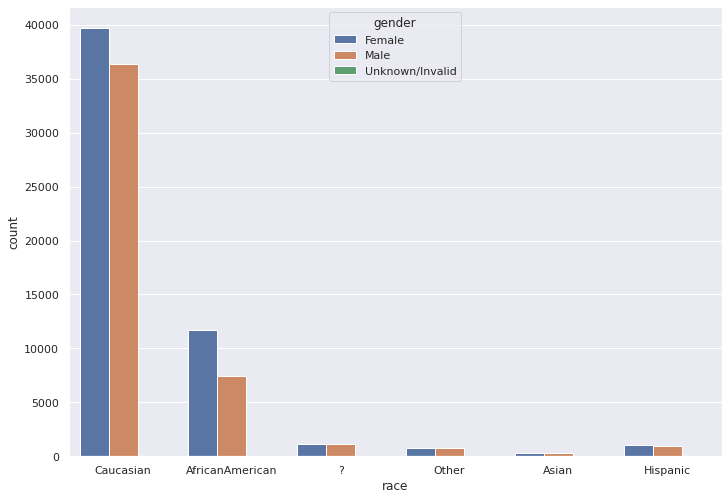

In [1524]:
#Visualization - compare race and gender 
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='race', hue='gender', data=hospital_data)

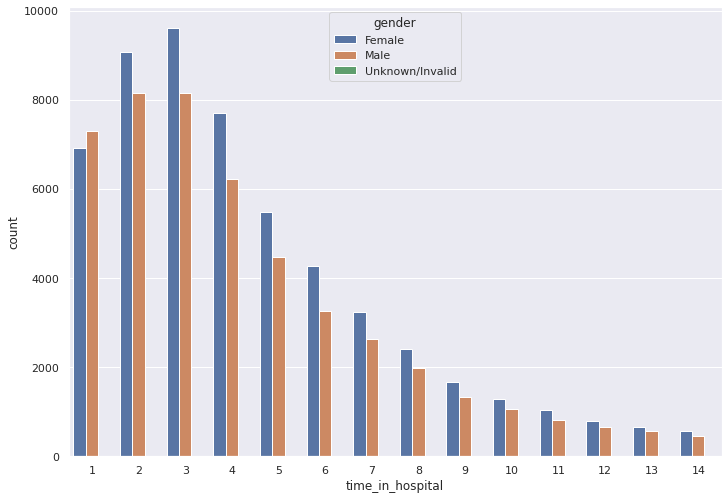

In [1525]:
#Visualization - compare time in hospital and gender
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='time_in_hospital', hue='gender', data=hospital_data)

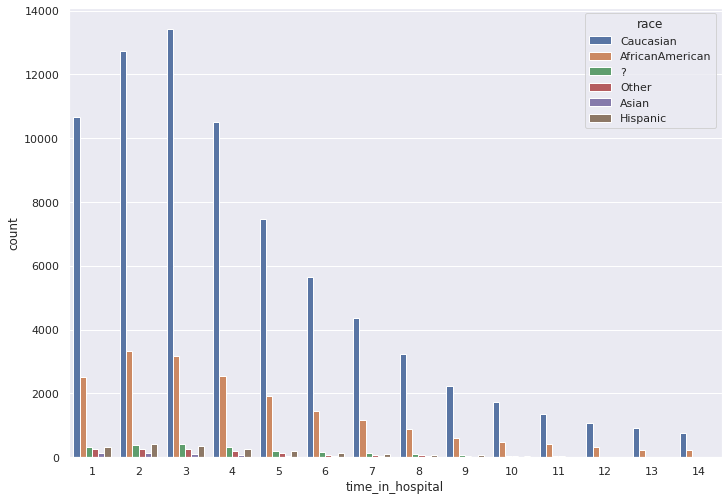

In [1526]:
#Visualization - compare time in hospital and race
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='time_in_hospital', hue='race', data=hospital_data)

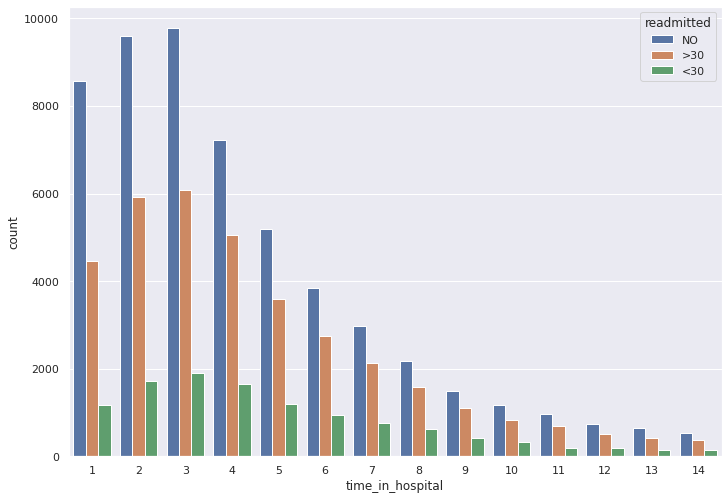

In [1527]:
#Visualization - compare time in hospital and readmitted 
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='time_in_hospital', hue='readmitted', data=hospital_data)

In [1528]:
#This was our updated data, we're going to clean it up further for logistic regression 
hospital_data

,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diabetesMed,readmitted
Number of Patients,,,,,,,,,,
0,8222157,Caucasian,Female,[0-10),1,41,0,1,No,NO
1,55629189,Caucasian,Female,[10-20),3,59,0,18,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),2,11,5,13,Yes,NO
3,82442376,Caucasian,Male,[30-40),2,44,1,16,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,51,0,8,Yes,NO
...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),3,51,0,16,Yes,>30
101762,74694222,AfricanAmerican,Female,[80-90),5,33,3,18,Yes,NO
101763,41088789,Caucasian,Male,[70-80),1,53,0,9,Yes,NO


In [1529]:
# Can't convert string to float in logistic regression, so convert all string values from data into real numbers 
# Ex: Go into race column, and change all races into their own number --> same for all columns that contain any string values 

hospital_data['race'].replace(['Caucasian','AfricanAmerican','?', 'Other', 'Asian', 'Hispanic'],[3,4,5,6,7,8],inplace=True)

hospital_data['gender'].replace(['Male','Female','Unknown/Invalid'],[0,1,2],inplace=True)

hospital_data['age'].replace(['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'],[0,1,2,3,4,5,6,7,8,9],inplace=True)

hospital_data['diabetesMed'].replace(['No','Yes'],[0,1],inplace=True)

hospital_data['readmitted'].replace(['NO','>30','<30'],[0,1,2],inplace=True)

hospital_data


,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diabetesMed,readmitted
Number of Patients,,,,,,,,,,
0,8222157,3,1,0,1,41,0,1,0,0
1,55629189,3,1,1,3,59,0,18,1,1
2,86047875,4,1,2,2,11,5,13,1,0
3,82442376,3,0,3,2,44,1,16,1,0
4,42519267,3,0,4,1,51,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...
101761,100162476,4,0,7,3,51,0,16,1,1
101762,74694222,4,1,8,5,33,3,18,1,0
101763,41088789,3,0,7,1,53,0,9,1,0


**LOGISTIC REGRESSION**

In [1530]:
ds = hospital_data

In [1531]:
# Figure out if patients are readmitted within the 30 days - this is the dependent variable (y) 
# Other information (X) is needed to make these predictions, columns in X are independent features 

y = ds['readmitted']
X = ds[['patient_nbr','race','gender', 'age', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'diabetesMed']]

In [1532]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50, random_state=1000)

In [1533]:
# Split the data into training set and testing set using train_test_split
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1534]:
# Train and fit a logistic regression model on the training set
logmodel = LogisticRegression()

In [1535]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1536]:
# Predict values for the testing data
y_pred = logmodel.predict(X_test)

In [1537]:
# Create a classification report for the model
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.95      0.69     27431
           1       0.40      0.06      0.10     17773
           2       0.00      0.00      0.00      5679

    accuracy                           0.54     50883
   macro avg       0.31      0.34      0.27     50883
weighted avg       0.43      0.54      0.41     50883



[[26165  1266     0]
 [16711  1062     0]
 [ 5352   327     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1538]:
# Confusion matrix --> Already imported in beginning, now just print it 
print(confusion_matrix(y_test, y_pred))

[[26165  1266     0]
 [16711  1062     0]
 [ 5352   327     0]]


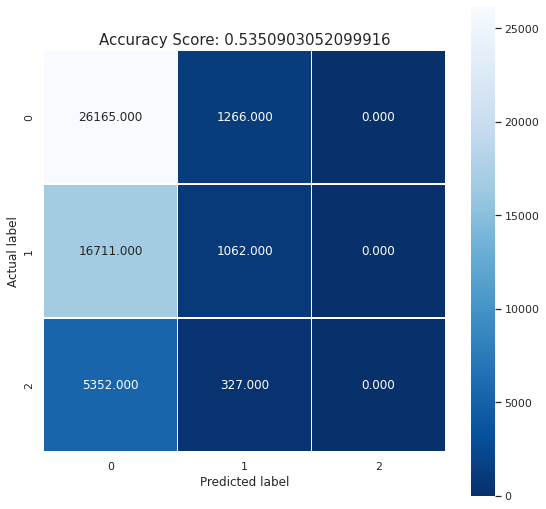

In [1539]:
# Visualization of Confusion Matrix
plot.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plot.ylabel('Actual label');
plot.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plot.title(all_sample_title, size = 15);

**CONCLUSION**

To improve the accuracy of my model: 

*   Include or access to more data 
    - We were given a range of age groups for each patient, but not an exact age. If we had exact ages, it could've helped make our model more accurate.
    - For race we had categories that included '?' and 'Other'. With this information we can see the effects race had on or along with the other features to determine readmittance. 

*   Fill or remove missing data 
    - Some of the data that we were presented with had some missing information. 
     -  Weight for each patient was included originally, but taken out because there was no actual information in it. Having this information could help us further determine whether weight contributed to being readmitted back into the hospital within 30 days.

